#  Handling Outliers

The success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers. The presence of this will prevent the machine learning model to properly learn. For this reason, detecting and dealing with outliers is one of the most important phases of data cleansing in a data science project.

Now, let’s get started 💚

## What is an Outlier

Outliers are extreme values that deviate from other observations on data
![Outliers_1](images\Outliers_1.png) 
<img src="images\outlier_histogram.png" width="300" height="300" />


## What is the reason for an outlier to exist in a dataset?
* Variability in the data (provide useful information such as fraud detection, new life)
* An experimental measurement error(doesn't provide any helpful knowledge)

## What are  the impacts of having outliers in a dataset?
1. It causes a significant impact on the ___ and the ___.
2. It may highly affect the performance of the learning algorithm
  * Tree-based models are generally not as affected by outliers.
  * The neural network is unaffected by the outliers' impact when the   percentage-outliers in the training data is lower than 15%
  * Outliers can have a dramatic impact on linear regression and can change the model equation completely

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
arr1_np = np.array([[25, 67, 45, 10000, 85, 120, 101, 15], 
                    [25, 67, 45, 100, 85, 120, 101, 15]])
column_values = ['Numbers_1', 'Numbers_2']
numbers_df = pd.DataFrame(data = np.transpose(arr1_np), 
                  columns = column_values)

In [5]:
numbers_df.describe()

,Numbers_1,Numbers_2
count,8.000000,8.000000
mean,1307.250000,69.750000
std,3512.588982,38.302368
min,15.000000,15.000000
25%,40.000000,40.000000
50%,76.000000,76.000000
75%,105.750000,100.250000
max,10000.000000,120.000000


The mean is more sensitive to the existence of outliers than the median or mode. The value of the mean can be distorted by the outliers.

Let's look at how to identify and deal with outliers in the `diamonds` dataset

In [6]:
diamond_df = sns.load_dataset('diamonds')
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamond_df.shape

(53940, 10)

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [8]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Identifying Outliers with Visualization
The simplest way to detect an outlier is by graphing the features or the data points. Visualization is one of the best and easiest ways to have an inference about the overall data and the outliers. Box plots, Histogram, and Scatter plots are the most preferred visualization tools to detect outliers.

## Boxplot
The box plot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. 
<img src="images/img_boxplot.svg" width=400 height=400 />

The line of code below plots the box plot of the numeric variable 'price' in the diamond dataset. 

<AxesSubplot:xlabel='price'>

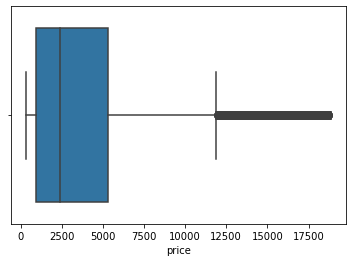

In [9]:
sns.boxplot(data = diamond_df, x='price')

In the above output, the bold black line indicate the outliers, and there are many.

## Histogram
A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'price' variable, using the hist() function.

<AxesSubplot:xlabel='price', ylabel='Count'>

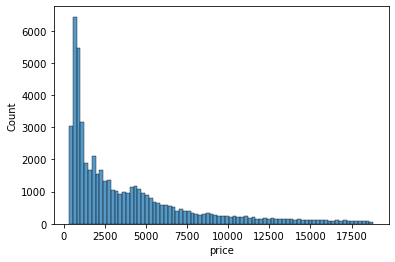

In [10]:
sns.histplot(data = diamond_df, x='price')

Note that, the above chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram, which could be outliers

## Scatterplot
A scatterplot visualizes the relationship between two quantitative variables. The data are displayed as a collection of points, and any points that fall outside the general clustering of the two variables may indicate outliers. The lines of code below generate a scatterplot between the variables 'price' and 'carat'.

<AxesSubplot:xlabel='carat', ylabel='price'>

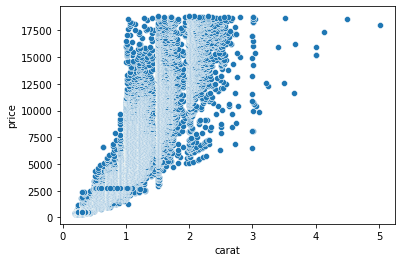

In [11]:
sns.scatterplot(data=diamond_df, x='carat', y='price')

Note that, the above chart indicates that most of the data points are clustered in the left half of the plot. The points located to the extreme right of the x-axis or the y-axis indicate outliers.

 # Two Common ways to Exclude (Extract) Outliers 

## 3𝜎( Empirical ) rule
A simple and widely used heuristic for outlier detection. Let $x$ be a feature/column/vector. Given a specific element $x_k$, 

$$
x_k \text{ is }
\begin{cases}
       \text{outlier,} &\quad\text{if } |x_k -\bar{x}| >3\sigma \\
       \text{nominal,} &\quad\text{else} \\
 \end{cases}
$$

<img src="images/Empirical.png" width=300 height=200 />

For an approximately normal data set, 
* the values within one standard deviation of the mean account for about 68% of the set; 
* while within two standard deviations account for about 95%; 
* and within three standard deviations account for about 99.7%.
* **any observations that fall outside of three standard deviations from the mean is considered an outlier.**

## Using Run-Sequence Plot to visualize the outliers under 3𝜎 rule
Run sequence plots are formed by: \
Vertical axis: Response variable Yi  \
Horizontal axis: Index i (i = 1, 2, 3, ... ) 

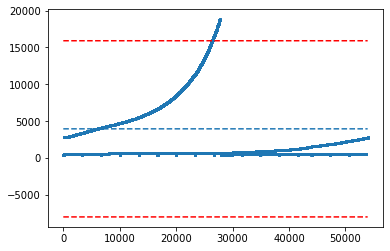

In [12]:
x = np.arange(len(diamond_df))
y=diamond_df['price']
plt.plot(x, y.mean()+x*0, '--')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=2)

In [13]:
diamond_df.shape

(53940, 10)

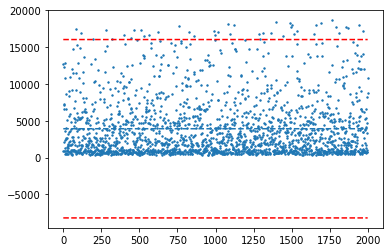

In [14]:
# sample the data
diamond_sample_df = diamond_df.sample(n=2000)
x = np.arange(len(diamond_sample_df))
y=diamond_sample_df['price']
plt.plot(x, y.mean()+x*0, '--')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=2)


The problem with this rule is that:
* mean and std are affected by outliers
* it assumes that x follows the normal distribution (although in practice it does not matter much)

## IQR Score

Define:
* *lower quantile* $x_L$ as $25\%$ quantile,  
* *upper quantile* $x_U$ as $75\%$ quantile 
* and *inter quantile* $Q=x_U-x_L$.

$$
x_k \text{ is }
\begin{cases}
       \text{upper outlier,} &\quad\text{if } x_k > x_U+1.5Q\\
        \text{lower outlier,} &\quad\text{if } x_k<x_L-1.5Q \\
       \text{nominal,} &\quad\text{else} \\
 \end{cases}
$$

![Boxplot](images\Boxplot.png)

**Any observations that fall outside of 1.5 times of an interquartile range is considered an outlier.**

### Using Run-Sequence Plot to visualize the outliers under IQR Score

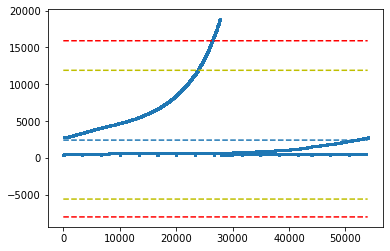

In [15]:
x=np.arange((len(diamond_df)))
y=diamond_df['price']
y_u,y_l=np.quantile(y,[0.75,0.25])
Q=y_u-y_l
plt.plot(x, y.median()+x*0, '--')
plt.plot(x, y_l-1.5*Q+x*0, '--',c='y')
plt.plot(x, y_u+1.5*Q+x*0, '--', c='y')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=2)

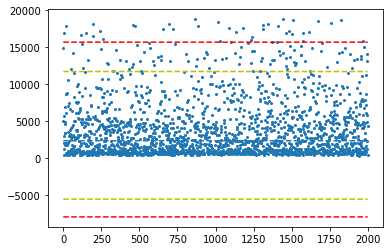

In [16]:
diamond_sample_df = diamond_df.sample(n=2000)
x=np.arange((len(diamond_sample_df)))
y=diamond_sample_df['price']
y_u,y_l=np.quantile(y,[0.75,0.25])
Q=y_u-y_l
plt.plot(x, y.median()+x*0, '--')
plt.plot(x, y_l-1.5*Q+x*0, '--',c='y')
plt.plot(x, y_u+1.5*Q+x*0, '--', c='y')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=4)


### Difference between 3𝜎( Empirical ) rule and IQR Score

<img src="images/Outliers.png" width=400 height=200 />

### Extracting outliers using 3𝜎

In [17]:
threshold  = diamond_df['price'].std()*3
threshold

11968.319214439138

In [18]:
diamond_outliers_df = diamond_df[diamond_df['price'] > threshold]
diamond_outliers_df.shape

(3484, 10)

In [19]:
diamond_df2 = diamond_df[diamond_df['price'] < threshold]
diamond_df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='price'>

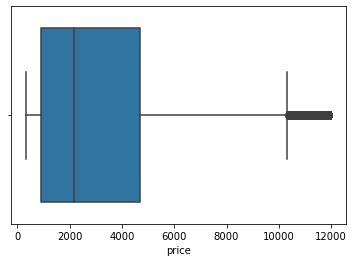

In [20]:
sns.boxplot(data = diamond_df2, x='price')

### Extracting outliers using IQR Score

In [21]:
# Calculate the IQR
q3 = diamond_df['price'].quantile(0.75)
q1 = diamond_df['price'].quantile(0.25)
IQR = q3 - q1
IQR

4374.25

In [22]:
# Setting the upperbound and lowerbound
upperrange = q3 + 1.5*IQR
bottomrange = q1 - 1.5*IQR
print (upperrange, bottomrange)

11885.625 -5611.375


In [23]:
diamond_outliers_df = diamond_df[diamond_df['price'] > upperrange]
diamond_outliers_df.shape

(3540, 10)

In [24]:
diamond_df3 = diamond_df[diamond_df['price'] < upperrange]
diamond_df3

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='price'>

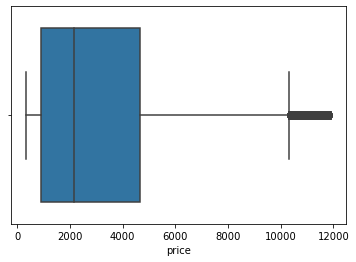

In [25]:
sns.boxplot(data = diamond_df3, x='price')

In [26]:
diamond_df3.describe()

,carat,depth,table,price,x,y,z
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000
mean,0.723657,61.755603,57.421873,3159.460833,5.582965,5.586255,3.448359
std,0.383757,1.430780,2.229414,2764.700316,0.994872,0.993937,0.630422
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,61.800000,57.000000,2155.000000,5.590000,5.570000,3.430000
75%,1.010000,62.500000,59.000000,4669.000000,6.430000,6.420000,3.980000
max,3.650000,79.000000,79.000000,11883.000000,9.540000,31.800000,31.800000


## Treating outliers

### Removing

In [27]:
index = diamond_df[diamond_df['price'] > upperrange].index
diamond_df.drop(index, inplace=True)

### Replacing Outliers with Median Values

In [28]:
median_price = diamond_df.loc[diamond_df['price']<upperrange, 'price'].median()
median_price

2155.0

You can use `np.where` to replace the values in one line

In [29]:
diamond_df['price'] = np.where(diamond_df['price']>upperrange, median_price, diamond_df['price'])

You can also use `loc` to assign values

`diamond_df.loc[diamond_df.price > upperrange, 'price'] = np.nan
 diamond_df.fillna(median_price,inplace=True)`

### Quantile-based Flooring and Capping

In [30]:
diamond_df['price'] = np.where(diamond_df['price'] <diamond_df['price'].quantile(0.10), diamond_df['price'].quantile(0.10),diamond_df['price'])
diamond_df['price'] = np.where(diamond_df['price'] >diamond_df['price'].quantile(0.90), diamond_df['price'].quantile(0.90),diamond_df['price'])

### Plotting after removing outliers

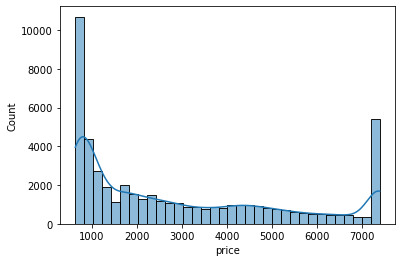

In [31]:
sns.histplot(diamond_df['price'], kde=True);

<AxesSubplot:xlabel='price'>

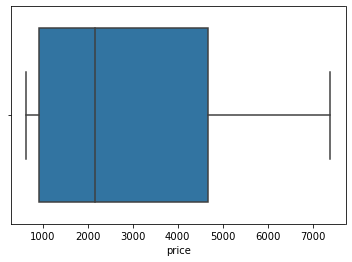

In [32]:
sns.boxplot(x=diamond_df['price'])